In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
data= pd.read_csv("data_with_nans.csv", sep=';')
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


## Gereksiz Kolonların Düşürülmesi

In [16]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [19]:
data.drop(labels=[data.columns[0], axis=1, inplace=True)


SyntaxError: invalid syntax (4026347531.py, line 1)

In [20]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [21]:
data.drop(labels=[data.columns[0]], axis=1, inplace=True)

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [22]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
data.groupby("Species").agg(["min", "max", "std", "mean"])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [24]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [25]:
for column in data.columns[1:-1]:
    data[column].fillna(value=data[column].mean(), inplace=True)

In [26]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
data.dropna(axis=0, how="any", inplace=True)

In [28]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Veri Görselleştirme

In [29]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [30]:
data["SepalLengthCm"]

0      5.1
1      4.7
2      4.9
3      4.4
4      5.0
      ... 
165    5.7
166    6.8
167    6.4
168    7.2
169    6.3
Name: SepalLengthCm, Length: 170, dtype: float64

<AxesSubplot:>

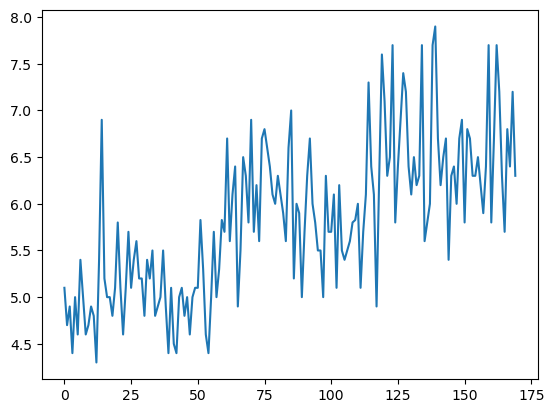

In [31]:
data["SepalLengthCm"].plot()

<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>

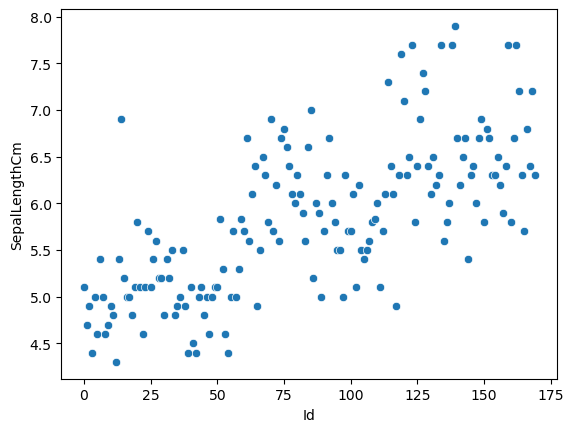

In [32]:
sns.scatterplot(data=data, x="Id", y="SepalLengthCm")

<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>

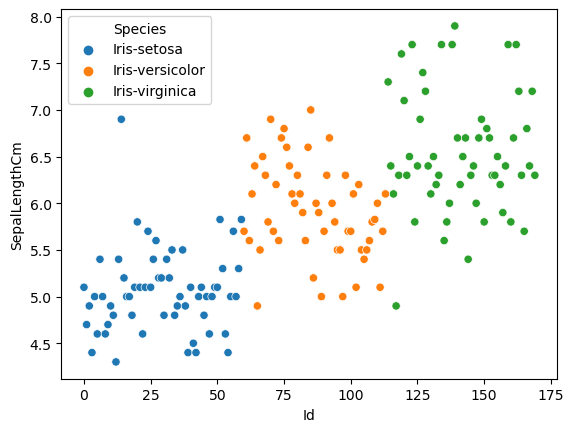

In [33]:
sns.scatterplot(data=data, x="Id", y="SepalLengthCm", hue="Species")

<AxesSubplot:xlabel='Id', ylabel='SepalWidthCm'>

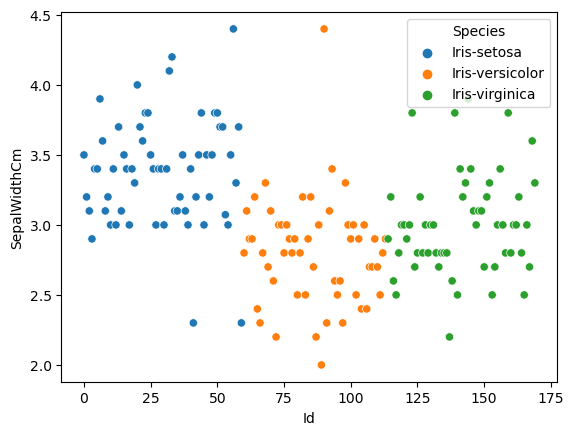

In [34]:
sns.scatterplot(data=data, x="Id", y="SepalWidthCm", hue="Species")

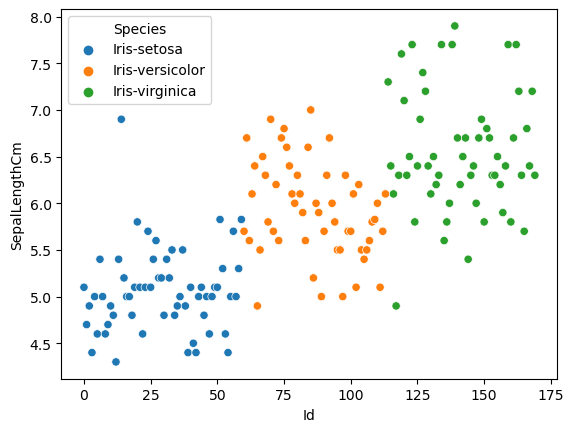

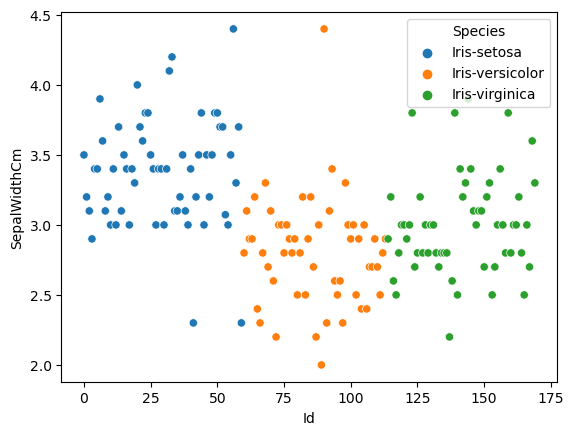

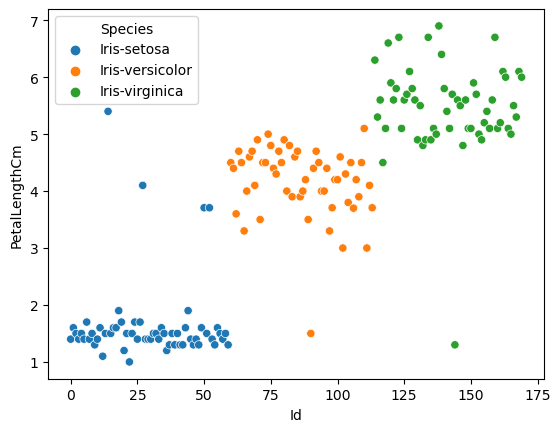

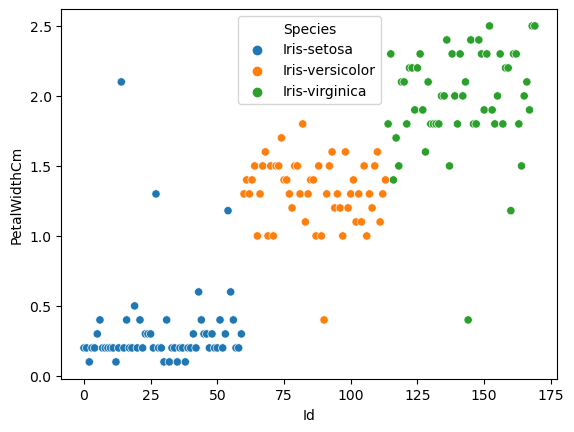

In [35]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue="Species")
    plt.show()

In [36]:
data["Species"]=="Iris-setosa"

0       True
1       True
2       True
3       True
4       True
       ...  
165    False
166    False
167    False
168    False
169    False
Name: Species, Length: 170, dtype: bool

In [37]:
data[data["Species"]=="Iris-setosa"]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,1,4.700000,3.200000,1.600000,0.200000,Iris-setosa
2,2,4.900000,3.100000,1.500000,0.100000,Iris-setosa
3,3,4.400000,2.900000,1.400000,0.200000,Iris-setosa
4,4,5.000000,3.400000,1.500000,0.200000,Iris-setosa
5,5,4.600000,3.400000,1.400000,0.300000,Iris-setosa
6,6,5.400000,3.900000,1.700000,0.400000,Iris-setosa
7,7,5.000000,3.600000,1.400000,0.200000,Iris-setosa
8,8,4.600000,3.100000,1.500000,0.200000,Iris-setosa
9,9,4.700000,3.200000,1.300000,0.200000,Iris-setosa


In [38]:
selected_spec=data[data["Species"]=="Iris-setosa"]
selected_spec["SepalLengthCm"]

0     5.100000
1     4.700000
2     4.900000
3     4.400000
4     5.000000
5     4.600000
6     5.400000
7     5.000000
8     4.600000
9     4.700000
10    4.900000
11    4.800000
12    4.300000
13    5.400000
14    6.900000
15    5.200000
16    5.000000
17    5.000000
18    4.800000
19    5.100000
20    5.800000
21    5.100000
22    4.600000
23    5.100000
24    5.700000
25    5.100000
26    5.400000
27    5.600000
28    5.200000
29    5.200000
30    4.800000
31    5.400000
32    5.200000
33    5.500000
34    4.800000
35    4.900000
36    5.000000
37    5.500000
38    4.900000
39    4.400000
40    5.100000
41    4.500000
42    4.400000
43    5.000000
44    5.100000
45    4.800000
46    5.000000
47    4.600000
48    5.000000
49    5.100000
50    5.100000
51    5.826347
52    5.300000
53    4.600000
54    4.400000
55    5.000000
56    5.700000
57    5.000000
58    5.300000
59    5.826347
Name: SepalLengthCm, dtype: float64

In [39]:
selected_column = selected_spec["SepalLengthCm"]

In [40]:
std=selected_column.std()
avg=selected_column.mean()

In [41]:
three_sigma_plus = avg + (3 * std)
three_sigma_minus =  avg - (3 * std)

In [42]:
three_sigma_plus

6.397012123414941

In [43]:
three_sigma_minus

3.7247443636110074

In [44]:
selected_column[((selected_spec["SepalLengthCm"]>three_sigma_plus)|(selected_spec["SepalLengthCm"]<three_sigma_minus))]

14    6.9
Name: SepalLengthCm, dtype: float64

In [51]:
selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

In [ ]:
# loop;

In [53]:
for column in data.columns[1:-1]:

IndentationError: expected an indented block (237729268.py, line 1)

In [54]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
       print(column,spec)

SepalLengthCm Iris-setosa
SepalLengthCm Iris-versicolor
SepalLengthCm Iris-virginica
SepalWidthCm Iris-setosa
SepalWidthCm Iris-versicolor
SepalWidthCm Iris-virginica
PetalLengthCm Iris-setosa
PetalLengthCm Iris-versicolor
PetalLengthCm Iris-virginica
PetalWidthCm Iris-setosa
PetalWidthCm Iris-versicolor
PetalWidthCm Iris-virginica


In [55]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3 * std)
        three_sigma_minus =  avg - (3 * std)
        
        print(column, spec, std)


SepalLengthCm Iris-setosa 0.44537795996732216
SepalLengthCm Iris-versicolor 0.5114987805924472
SepalLengthCm Iris-virginica 0.6500249745451844
SepalWidthCm Iris-setosa 0.3895400006760869
SepalWidthCm Iris-versicolor 0.3823545063857089
SepalWidthCm Iris-virginica 0.35520252134357266
PetalLengthCm Iris-setosa 0.7379185596913446
PetalLengthCm Iris-versicolor 0.6181954773950145
PetalLengthCm Iris-virginica 0.7951945771849905
PetalWidthCm Iris-setosa 0.3146725915904457
PetalWidthCm Iris-versicolor 0.23504909756675557
PetalWidthCm Iris-virginica 0.3664386690785569


In [56]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3 * std)
        three_sigma_minus =  avg - (3 * std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        data.drop(index=outliers, inplace=True)
        
        print(column, spec, outliers)

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([90], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([144], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


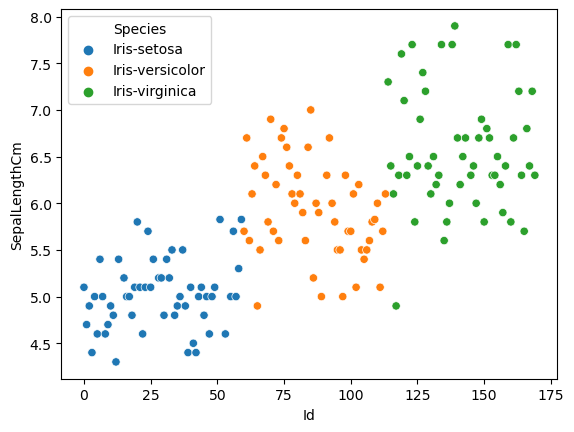

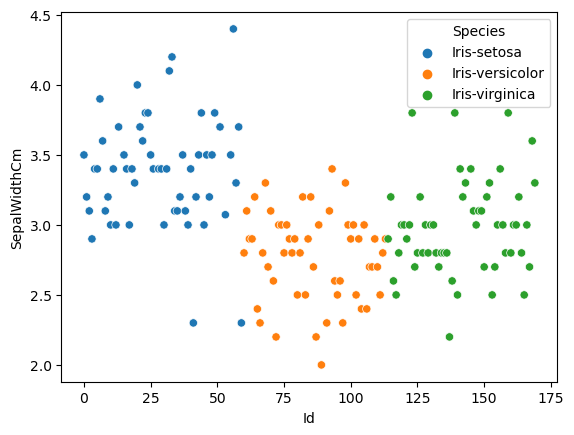

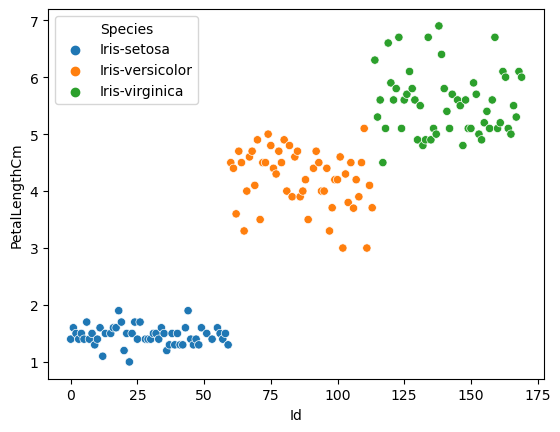

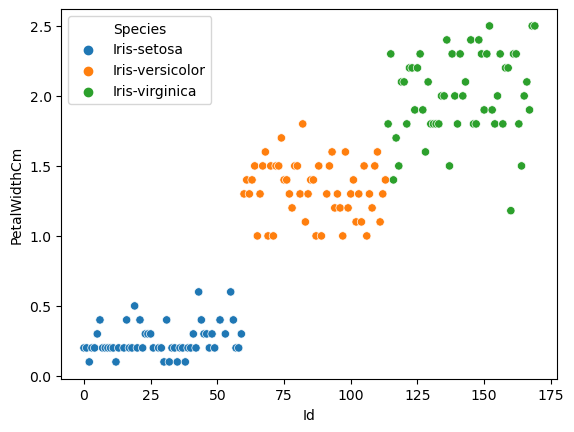

In [57]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue="Species")
    plt.show()